In [350]:
#importing required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [351]:
#read data
def loaddata(filename):
    traindata = pd.read_csv(filename)
    return traindata

In [352]:
def preprocess(data):
    for i in range(data['sex'].size):
        if data['sex'][i] == 'female':
            data.loc[i, 'sex'] = 0
        else:
            data.loc[i, 'sex'] = 1
    data['sex'] = pd.to_numeric(data['sex'])

    for i in range(data['smoker'].size):
        if data['smoker'][i] == 'no':
            data.loc[i,'smoker'] = 0
        else:
            data.loc[i,'smoker'] = 1
    data['smoker'] = pd.to_numeric(data['smoker'])

    for i in range(data['region'].size):
        if data['region'][i] == 'northeast':
            data.loc[i,'region'] = 0
        elif data['region'][i] == 'northwest':
            data.loc[i,'region'] = 1
        elif data['region'][i] == 'southeast':
            data.loc[i,'region'] = 2
        elif data['region'][i] == 'southwest':
            data.loc[i,'region'] = 3
    data['region'] = pd.to_numeric(data['region'])
    
    #remove null values
    data = data.dropna()
    return data

In [353]:
def hyp(x,theta):
    yp = 0.0
    n = x.shape[0]
    for i in range(n):
        yp += (theta[i]*x[i])
    return yp

In [354]:
def error(x_train,y_train,theta):
    e = 0.0
    n = x_train.shape[0]
    for i in range(n):
        yp = hyp(x_train[i],theta)
        e += (y_train[i] - yp)**2
    return e/n

In [355]:
def gradient(x_train,y_train,theta):
    m,n = x_train.shape
    grad = np.zeros((n,))
    for j in range(n):
        for i in range(m):
            yp = hyp(x_train[i],theta)
            grad[j] += (yp - y_train[i])*x_train[i][j]
    return grad/m

In [356]:
def gradient_descent(x_train,y_train,lr=0.00000005,max_epochs=7700):
    m,n = x_train.shape
    theta = np.zeros((n,))
    temp = np.zeros((n,))
    error_list = []
    grad = gradient(x_train,y_train,theta)
    for i in range(max_epochs):
        e = error(x_train,y_train,theta)
        error_list.append(e)
        for j in range(n):
            temp[j] = theta[j] - lr*grad[j]
        temp = theta
    return theta,error_list

In [357]:
def accuracy(x_train,y_train,theta):
    n = x_train.shape[0]
    ymean = np.mean(y_train)
    ss_t = 0
    ss_r = 0
    for i in range(n):
        y_pred = hyp(x_train[i],theta)
        ss_t += (y_train[i]-ymean)**2
        ss_r += (y_train[i]-y_pred)**2
    r2 = 1 - (ss_r/ss_t)
    print(r2)

In [358]:
def main():
    filename = 'Medical Price Dataset.csv'
    data = loaddata(filename)
    traindata = preprocess(data)
    x_train = traindata.drop(['charges'],axis=1)
    y_train = traindata['charges'].values
    ones = np.ones((x_train.shape[0],1))
    x_train = np.hstack((ones,x_train))
    theta,error_list = gradient_descent(x_train,y_train)
    print(theta)
    plt.plot(error_list)
    plt.show()
    accuracy(x_train,y_train,theta)

[  5.10844905 219.85670993   2.71443372 162.27666632   5.97517607
   2.52656193   7.7108982 ]


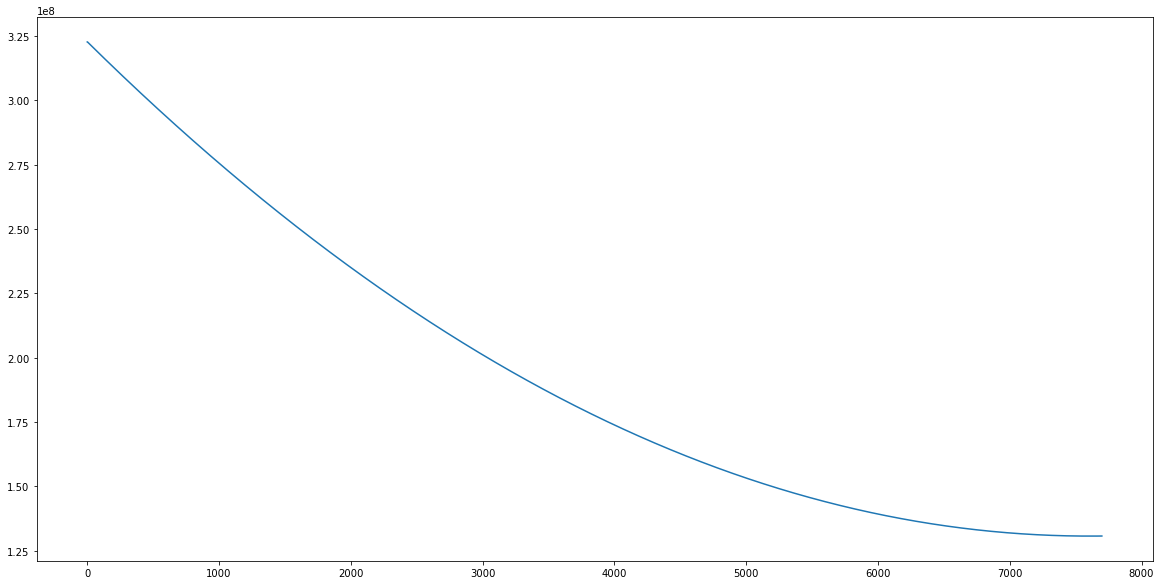

0.10800440935531352


In [359]:
main()